### Edgar Moises Hernandez-Gonzalez
#### Asesores: Pilar Gomez-Gil, Erik Bojorges-Valdez
#### Instituto Nacional de Astrofísica Óptica y Electrónica (INAOE)
#### 21/07/20-24/11/20
#### Tesis: Clasificación de señales EEG basada en representaciones bidimensionales y redes neuronales convolucionales
#### Imagen de escalograma con CWT de EEG de BCI competition IV dataset 2b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

In [ ]:
# importar un canal de una muestra
# la muestra 2 es mano derecha para el train del sujeto 1
# canal C3 (canal 1)
# canal C4 (canal 3) (usar este)
canal = pd.read_csv("MI-EEG-B1T.csv", header=None).iloc[1, 2000:3000]

In [ ]:
canal.shape

(1000,)

(1000,)


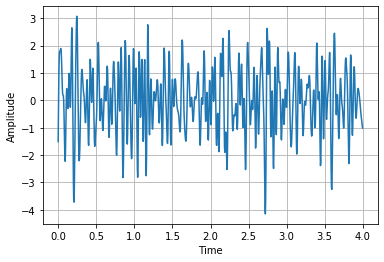

In [ ]:
# 4 segundos con fs=250Hz
fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# calcular las escalas de 8-30Hz con pasos de 0.5Hz para complex Morlet wavelets
# f = scale2frequency(wavelet, scale)/sampling_period
escalas = pywt.scale2frequency('cmor3-3', np.arange(8,30.5,0.5)) / (1/fs)
print(escalas)

[93.75       88.23529412 83.33333333 78.94736842 75.         71.42857143
 68.18181818 65.2173913  62.5        60.         57.69230769 55.55555556
 53.57142857 51.72413793 50.         48.38709677 46.875      45.45454545
 44.11764706 42.85714286 41.66666667 40.54054054 39.47368421 38.46153846
 37.5        36.58536585 35.71428571 34.88372093 34.09090909 33.33333333
 32.60869565 31.91489362 31.25       30.6122449  30.         29.41176471
 28.84615385 28.30188679 27.77777778 27.27272727 26.78571429 26.31578947
 25.86206897 25.42372881 25.        ]


In [ ]:
# Escalograma (CWT)
# pywt.cwt(senal, escalas, tipo wavelet, periodo de muestreo = (1 / fs))
coef, freqs = pywt.cwt(sig, escalas, 'cmor3-3', sampling_period = (1 / fs))

In [ ]:
# dado que cmor3-3 genera numeros complejos, calcular el modulo
# la formula del modulo se presenta en la siguiente celda
x = abs(coef)

$|z| = |a + bi| = \sqrt{a^2 + b^2}$

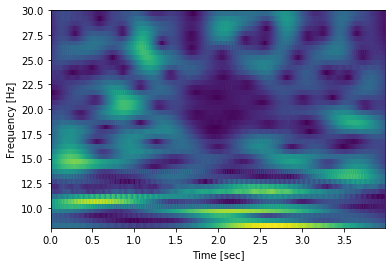

In [ ]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

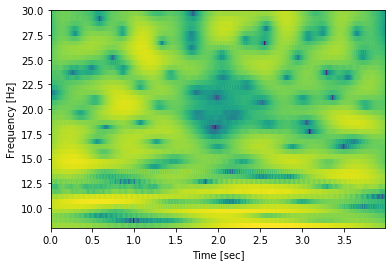

In [ ]:
# esto no se utilizo en la tesis, es un trabajo futuro
# imprimir aplicando ln para resaltar el color
plt.pcolormesh(time, freqs, np.log(x))
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(45, 1000)


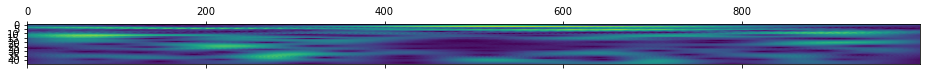

In [ ]:
print(x.shape)
plt.matshow(x)
plt.show()

(22, 500)


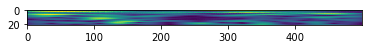

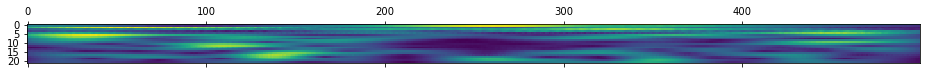

In [ ]:
# resize proporcional de dos con interpolacion inter area
# reducir el tamaño entre 2
dim = (int(np.floor(x.shape[1]/2)), int(np.floor(x.shape[0]/2))) # ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()
# otra manera de imprimir la imagen
plt.matshow(resized)
plt.show()

In [ ]:
# ln de CWT, para resaltar los colores
x_log = np.log(resized)

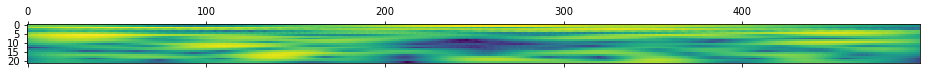

In [ ]:
plt.matshow(x_log)
plt.show()